# Data Preprocessing Tools

## Importing the libraries

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.4 MB/s 
     |████████████████████████████████| 193.6 MB 50 kB/s 
     |████████████████████████████████| 139 kB 68.0 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=f2083881f5c53b906a2e7b3913649ddf14c54bc51c3733fd766138967285bddd
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
train = pd.read_csv("train-1.csv")
test = pd.read_csv("test.csv")
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)
both = both.sample(frac=0.10, replace=True, random_state=1)

In [ ]:
print(len(both))

1030


In [ ]:
print(test)

## Taking care of missing data

In [ ]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,972,float64
tBodyAcc-mean()-Y,0,972,float64
tBodyAcc-mean()-Z,0,972,float64
tBodyAcc-std()-X,0,972,float64
tBodyAcc-std()-Y,0,972,float64
...,...,...,...
"angle(Y,gravityMean)",0,972,float64
"angle(Z,gravityMean)",0,972,float64
subject,0,30,object
Activity,0,6,object


In [ ]:
activity = both['Activity']
label_counts = activity.value_counts()

# plt.figure(figsize= (12, 8))
# plt.bar(label_counts.index, label_counts)

In [ ]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

In [ ]:
print(train)

[[-1.70614350e+01  5.66438743e+00  5.79382745e-01 ... -4.09576252e-01
  -8.61427705e-02 -4.33322887e-01]
 [ 6.51200608e+00 -4.63371018e+00 -3.90130223e+00 ... -1.52639407e+00
  -9.82100873e-01  1.10805220e+00]
 [-1.60559952e+01  5.80378577e+00 -3.80128257e-01 ...  1.36093870e+00
  -1.45478484e-02 -2.53461742e-01]
 ...
 [ 1.04058142e+01 -4.01304459e+00  2.67254890e+00 ... -1.45478191e+00
   1.94745791e+00 -4.27751049e-01]
 [ 7.27214699e+00 -1.35323003e+01  3.06328384e+00 ... -2.97603203e-01
   2.99437088e-01  1.38359729e+00]
 [-1.62017435e+01  7.37397001e+00 -1.36693770e+00 ...  6.15318759e-01
  -3.20261126e-01 -3.54369807e-01]]


## Scaleing

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train)

# print(train)

### Reduceing Dimension with PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pc = pca.fit_transform(train)
print(pc)

[[-17.06143499   5.66438625   0.57948929 ...   0.58774361  -0.43641065
   -0.5198392 ]
 [  6.51200608  -4.63371907  -3.90179048 ...   1.09351468  -0.15218051
   -1.34860681]
 [-16.05599516   5.80377963  -0.38038747 ...  -0.51194634   0.53427223
    0.50371323]
 ...
 [ 10.40581424  -4.01303245   2.67177604 ...   0.78439668  -6.88730356
   -1.91759178]
 [  7.27214699 -13.5323203    3.06360964 ...  -0.49472338  -1.89266357
   -1.01177262]
 [-16.20174354   7.3739671   -1.36677789 ...   0.67799329  -0.46285869
   -0.60162974]]


In [ ]:
len(pc[2])

20

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(pc, activity, test_size = 0.2, random_state = 0)

# Activity Recognition Algorithm

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9028478142572103

Generation 2 - Current best internal CV score: 0.9028478142572103

Generation 3 - Current best internal CV score: 0.9028478142572103

Generation 4 - Current best internal CV score: 0.9028478142572103

Generation 5 - Current best internal CV score: 0.9028478142572103

Best pipeline: MLPClassifier(input_matrix, alpha=0.1, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9001451115545077

Generation 2 - Current best internal CV score: 0.9082260112461455

Generation 3 - Current best internal CV score: 0.9136223471793941

Generation 4 - Current best internal CV score: 0.9136223471793941

Generation 5 - Current best internal CV score: 0.9136223471793941

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8987665517866861

Generation 2 - Current best internal CV score: 0.8987665517866861

Generation 3 - Current best internal CV score: 0.8987665517866861

Generation 4 - Current best internal CV score: 0.9055051695991294

Generation 5 - Current best internal CV score: 0.9055051695991294

Best pipeline: MLPClassifier(SelectFwe(input_matrix, alpha=0.024), alpha=0.0001, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.908207872301832

Generation 2 - Current best internal CV score: 0.908207872301832

Generation 3 - Current best internal CV score: 0.9109196444766916

Generation 4 - Current best internal CV score: 0.9109196444766916

Generation 5 - Current best internal CV score: 0.9109196444766916

Best pipeline: MLPClassifier(PolynomialFeatures(Normalizer(input_matrix, norm=l1), degree=2, include_bias=False, interaction_only=False), alpha=0.001, learning_rate_init=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.894875748231453

Generation 2 - Current best internal CV score: 0.894875748231453

Generation 3 - Current best internal CV score: 0.9029385089787775

Generation 4 - Current best internal CV score: 0.9029385089787775

Generation 5 - Current best internal CV score: 0.9029747868674043

Best pipeline: MLPClassifier(ZeroCount(input_matrix), alpha=0.01, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8935243968801017

Generation 2 - Current best internal CV score: 0.8935334663522582

Generation 3 - Current best internal CV score: 0.894875748231453

Generation 4 - Current best internal CV score: 0.894875748231453

Generation 5 - Current best internal CV score: 0.9016506439325231

Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8908035552330855

Generation 2 - Current best internal CV score: 0.8908035552330855

Generation 3 - Current best internal CV score: 0.8962180301106475

Generation 4 - Current best internal CV score: 0.8962180301106475

Generation 5 - Current best internal CV score: 0.8962180301106475

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8840830763649554

Generation 2 - Current best internal CV score: 0.8948938871757663

Generation 3 - Current best internal CV score: 0.8975784509341557

Generation 4 - Current best internal CV score: 0.8975784509341557

Generation 5 - Current best internal CV score: 0.8975784509341557

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.912425176854707

Generation 2 - Current best internal CV score: 0.912425176854707

Generation 3 - Current best internal CV score: 0.912425176854707

Generation 4 - Current best internal CV score: 0.912425176854707

Generation 5 - Current best internal CV score: 0.912425176854707

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8989570107019771

Generation 2 - Current best internal CV score: 0.8989570107019771

Generation 3 - Current best internal CV score: 0.8989570107019771

Generation 4 - Current best internal CV score: 0.9029838563395611

Generation 5 - Current best internal CV score: 0.9029838563395611

Best pipeline: MLPClassifier(CombineDFs(SelectFwe(VarianceThreshold(input_matrix, threshold=0.0005), alpha=0.017), input_matrix), alpha=0.01, learning_rate_init=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9065558019216555

Generation 2 - Current best internal CV score: 0.910169992609017

Generation 3 - Current best internal CV score: 0.910169992609017

Generation 4 - Current best internal CV score: 0.910169992609017

Generation 5 - Current best internal CV score: 0.910169992609017

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.01)
                    precision    recall  f1-score   support

            LAYING       0.95      0.95      0.95        42
           SITTING       0.76      0.85      0.80        40
          STANDING       0.85      0.71      0.77        31
           WALKING       0.94      1.00      0.97        33
WALKING_DOWNSTAIRS       0.97      0.97      0.97        31
  WALKING_UPSTAIRS       0.96      0.90      0.93        29

          accuracy                           0.90       206
         macro avg       0.90      0.90      0.90       206
      weighted avg       0.90      0.90      0

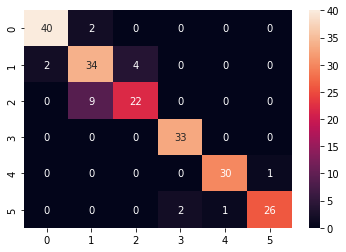

In [ ]:

# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

from tpot import TPOTClassifier

tic = time.perf_counter()
model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

toc = time.perf_counter()
tictoc = toc - tic

In [ ]:
print(f"Trained in {toc - tic:0.4f} seconds")

Trained in 6973.0458 seconds
